__Exploratory data analysis for credit card transactions data__


In [1]:
#########################
# List the catalogs
#########################

catalog.list()

['raw_daily_data', 'parameters']

In [7]:
#########################
# Read tx data in pyspark dataframe
#########################

df = catalog.load("raw_daily_data")
df.printSchema()
df.count()

[07/31/24 11:51:44] INFO     Loading data from raw_daily_data (SparkDataset)...                 ]8;id=990673;file://C:\ProgramData\anaconda3\envs\pyspark-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=227179;file://C:\ProgramData\anaconda3\envs\pyspark-env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

root
 |-- TRANSACTION_ID: integer (nullable = true)
 |-- TX_DATETIME: timestamp (nullable = true)
 |-- CUSTOMER_ID: integer (nullable = true)
 |-- TERMINAL_ID: integer (nullable = true)
 |-- TX_AMOUNT: double (nullable = true)
 |-- TX_TIME_SECONDS: integer (nullable = true)
 |-- TX_TIME_DAYS: integer (nullable = true)
 |-- TX_FRAUD: integer (nullable = true)
 |-- TX_FRAUD_SCENARIO: integer (nullable = true)
 |-- TX_DURING_WEEKEND: integer (nullable = true)
 |-- TX_DURING_NIGHT: integer (nullable = true)
 |-- CUSTOMER_ID_NB_TX_1DAY_WINDOW: double (nullable = true)
 |-- CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW: double (nullable = true)
 |-- CUSTOMER_ID_NB_TX_7DAY_WINDOW: double (nullable = true)
 |-- CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW: double (nullable = true)
 |-- CUSTOMER_ID_NB_TX_30DAY_WINDOW: double (nullable = true)
 |-- CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW: double (nullable = true)
 |-- TERMINAL_ID_NB_TX_1DAY_WINDOW: double (nullable = true)
 |-- TERMINAL_ID_RISK_1DAY_WINDOW: double (null

1754155

In [5]:
df.show(5)

+--------------+-------------------+-----------+-----------+---------+---------------+------------+--------+-----------------+-----------------+---------------+-----------------------------+----------------------------------+-----------------------------+----------------------------------+------------------------------+-----------------------------------+-----------------------------+----------------------------+-----------------------------+----------------------------+------------------------------+-----------------------------+
|TRANSACTION_ID|        TX_DATETIME|CUSTOMER_ID|TERMINAL_ID|TX_AMOUNT|TX_TIME_SECONDS|TX_TIME_DAYS|TX_FRAUD|TX_FRAUD_SCENARIO|TX_DURING_WEEKEND|TX_DURING_NIGHT|CUSTOMER_ID_NB_TX_1DAY_WINDOW|CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW|CUSTOMER_ID_NB_TX_7DAY_WINDOW|CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW|CUSTOMER_ID_NB_TX_30DAY_WINDOW|CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW|TERMINAL_ID_NB_TX_1DAY_WINDOW|TERMINAL_ID_RISK_1DAY_WINDOW|TERMINAL_ID_NB_TX_7DAY_WINDOW|TERMINAL_ID_RISK_

In [8]:
#########################
# Examine the dataset for missing values, summary statistics, and unique values for categorical columns.
#########################

from pyspark.sql.functions import col, count, when, hour, dayofweek
# Check for null values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Summary statistics
df.describe().show()

# Count unique values for categorical columns
df.select("TX_FRAUD_SCENARIO").distinct().count()
df.groupBy("TX_FRAUD_SCENARIO").count().show()


+--------------+-----------+-----------+-----------+---------+---------------+------------+--------+-----------------+-----------------+---------------+-----------------------------+----------------------------------+-----------------------------+----------------------------------+------------------------------+-----------------------------------+-----------------------------+----------------------------+-----------------------------+----------------------------+------------------------------+-----------------------------+
|TRANSACTION_ID|TX_DATETIME|CUSTOMER_ID|TERMINAL_ID|TX_AMOUNT|TX_TIME_SECONDS|TX_TIME_DAYS|TX_FRAUD|TX_FRAUD_SCENARIO|TX_DURING_WEEKEND|TX_DURING_NIGHT|CUSTOMER_ID_NB_TX_1DAY_WINDOW|CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW|CUSTOMER_ID_NB_TX_7DAY_WINDOW|CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW|CUSTOMER_ID_NB_TX_30DAY_WINDOW|CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW|TERMINAL_ID_NB_TX_1DAY_WINDOW|TERMINAL_ID_RISK_1DAY_WINDOW|TERMINAL_ID_NB_TX_7DAY_WINDOW|TERMINAL_ID_RISK_7DAY_WINDOW|TERM

[07/31/24 12:02:08] WARNING  C:\ProgramData\anaconda3\envs\pyspark-env\lib\site-packages\seaborn\_o ]8;id=857562;file://C:\ProgramData\anaconda3\envs\pyspark-env\lib\warnings.py\warnings.py]8;;\:]8;id=123086;file://C:\ProgramData\anaconda3\envs\pyspark-env\lib\warnings.py#109\109]8;;\
                             ldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and                 
                             will be removed in a future version. Convert inf values to NaN before                 
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

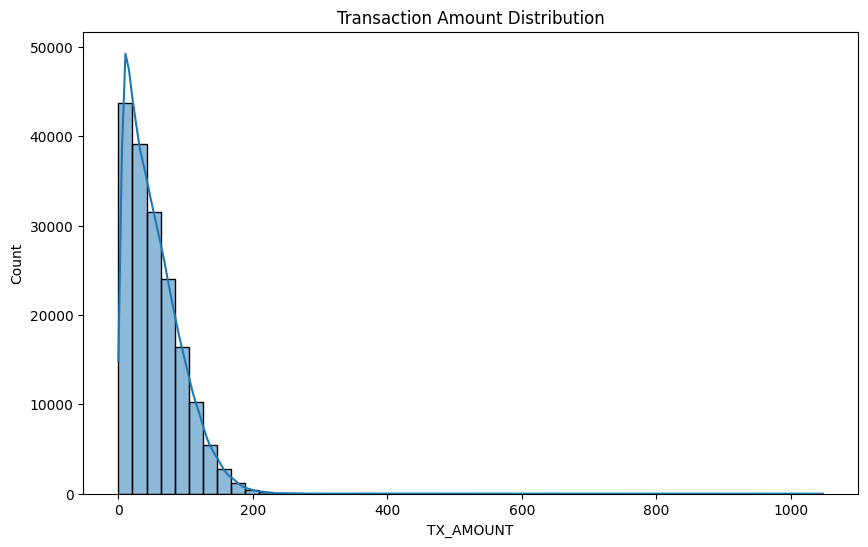

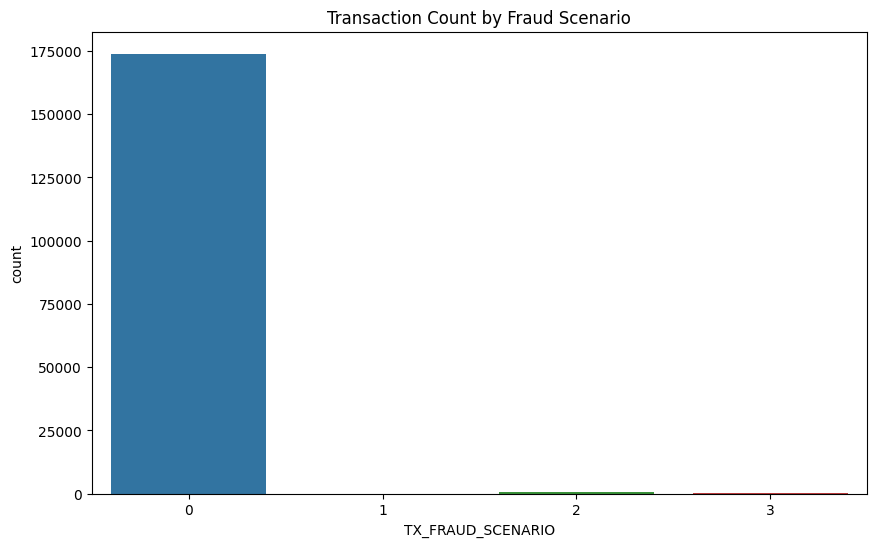

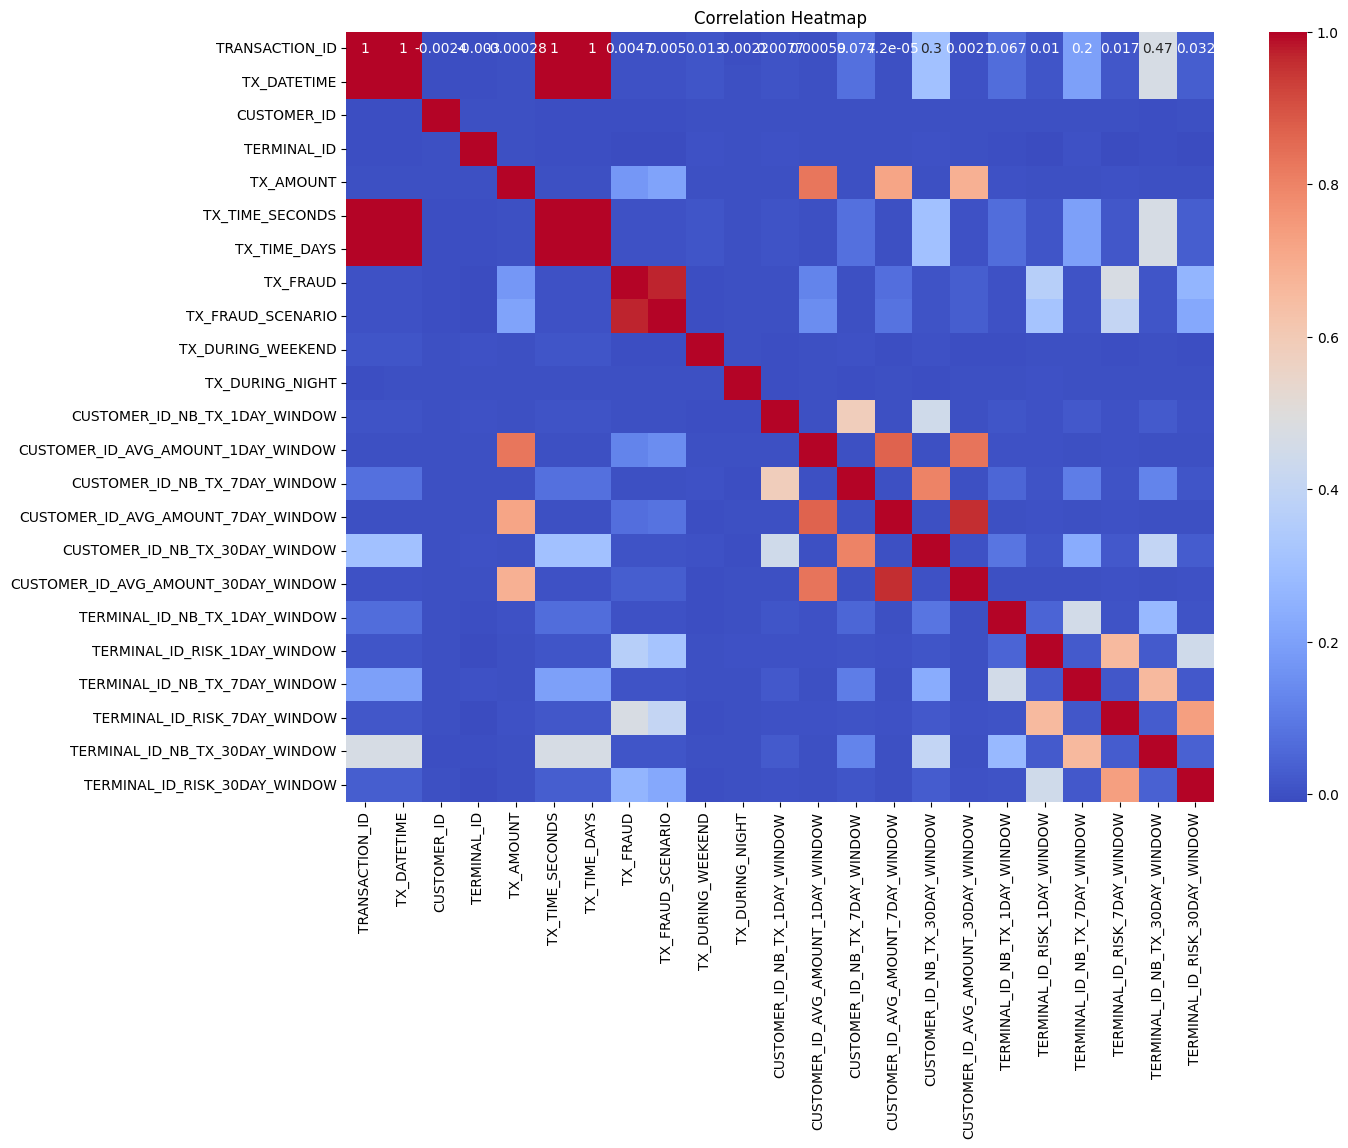

In [11]:
#########################
# Convert the Spark DataFrame to a Pandas DataFrame for visualization using Matplotlib and Seaborn.
#########################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas DataFrame
df_sample = df.sample(fraction=0.10)
df_pandas = df_sample.toPandas()

# Plotting TX_AMOUNT distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas["TX_AMOUNT"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Plotting transaction counts by fraud scenario
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pandas, x="TX_FRAUD_SCENARIO")
plt.title("Transaction Count by Fraud Scenario")
plt.show()

# Plotting correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_pandas.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



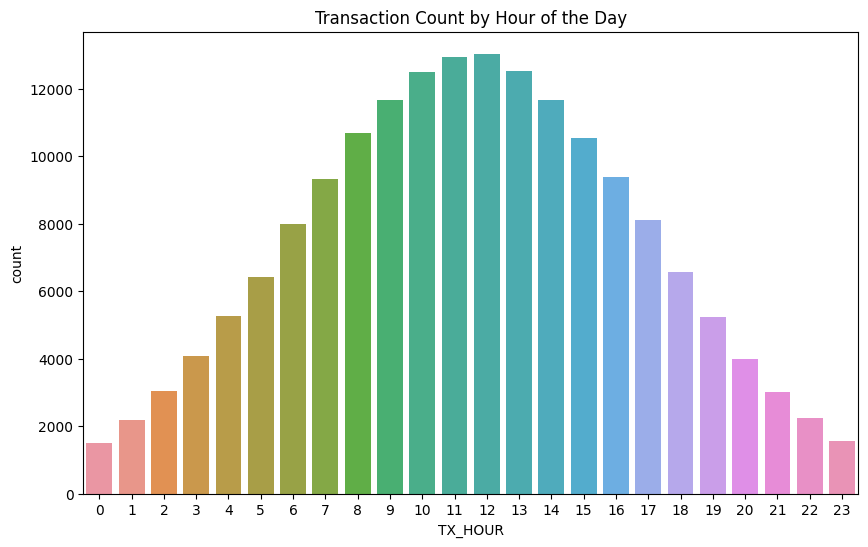

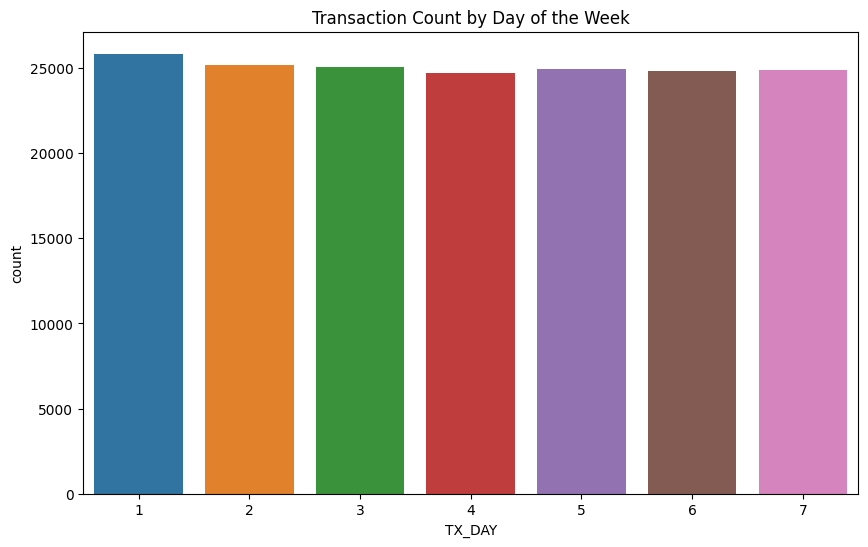

In [12]:
#########################
# Explore time-based trends such as transaction counts by time of day or day of the week.
#########################

from pyspark.sql.functions import hour, dayofweek

# Extract hour and day from datetime
df = df.withColumn("TX_HOUR", hour("TX_DATETIME"))
df = df.withColumn("TX_DAY", dayofweek("TX_DATETIME"))

# Convert to Pandas DataFrame
df_sample = df.sample(fraction=0.10)
df_pandas = df_sample.toPandas()

# Plotting transaction counts by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pandas, x="TX_HOUR")
plt.title("Transaction Count by Hour of the Day")
plt.show()

# Plotting transaction counts by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pandas, x="TX_DAY")
plt.title("Transaction Count by Day of the Week")
plt.show()